In [21]:
#importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('mushrooms.csv')
print(df.head())
df.shape

  class cap-shape cap-surface cap-color bruises odor gill-attachment   
0     p         x           s         n       t    p               f  \
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring   
0            c         n          k  ...                        s  \
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color   
0                      w                      w         p          w  \
1       

(8124, 23)

In [23]:
#missing datas
for i in df.columns:
    print(i,df[i].isnull().sum())


class 0
cap-shape 0
cap-surface 0
cap-color 0
bruises 0
odor 0
gill-attachment 0
gill-spacing 0
gill-size 0
gill-color 0
stalk-shape 0
stalk-root 0
stalk-surface-above-ring 0
stalk-surface-below-ring 0
stalk-color-above-ring 0
stalk-color-below-ring 0
veil-type 0
veil-color 0
ring-number 0
ring-type 0
spore-print-color 0
population 0
habitat 0


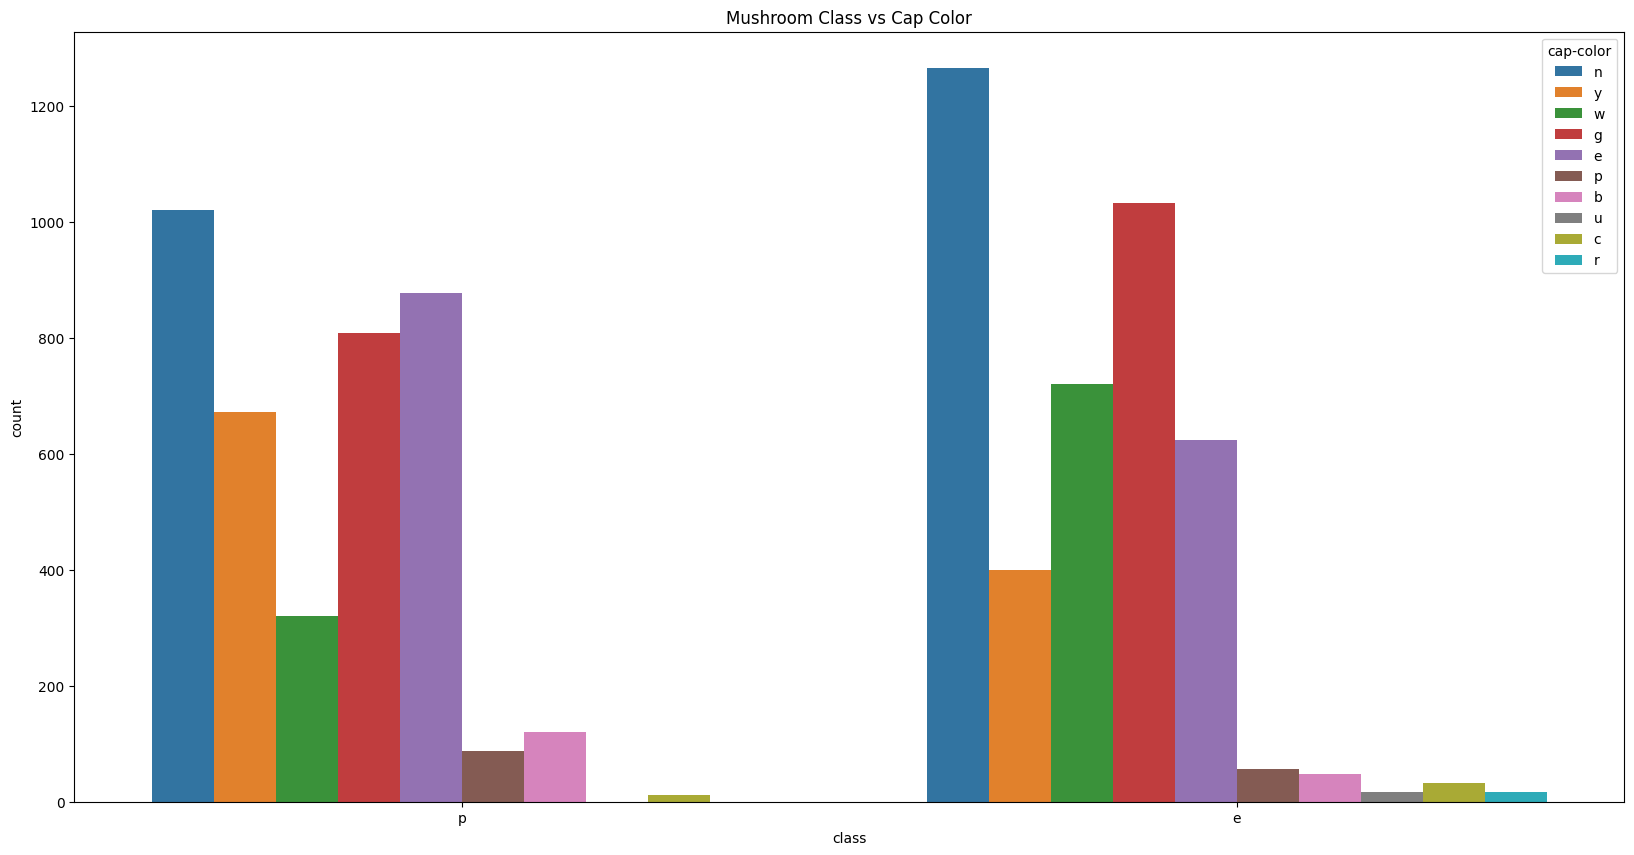

In [24]:
# Visualize the significant features by its distribution.
plt.figure(figsize=(20, 10))
sns.countplot(x='class', hue='cap-color', data=df)
plt.title('Mushroom Class vs Cap Color')
plt.show()

In [25]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    df[i]=le.fit_transform(df[i])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [38]:
# print("shape before removing outliers", df.shape)
# from scipy import stats
# for col in df.columns:
#   z_scores = stats.zscore(df[col])
#   threshold = 3
#   df = df[(z_scores < threshold)]

# print("shape after removing outliers", df.shape)

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
df2 = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]

df2.shape

(3600, 23)

### We balance the training set using the SMOTE (Synthetic Minority Over-sampling Technique) algorithm from the imbalanced-learn library. This generates synthetic samples of the minority class (poisonous mushrooms) to balance the dataset. The result is a balanced training set (X_train_balanced and y_train_balanced) that can be used to train an SVM classifier.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features=df.drop(['class'],axis=1)
result=df['class']

x_train,x_test,y_train,y_test=train_test_split(features,result,test_size=0.2)

sm=SMOTE(random_state=42)

x_train_balanced,y_train_balanced=sm.fit_resample(x_train,y_train)

print(y_train)

In [42]:
from sklearn.svm import SVC

rbf=SVC(kernel='rbf')
rbf.fit(x_train_balanced,y_train_balanced)

poly=SVC(kernel='poly')
poly.fit(x_train_balanced,y_train_balanced)

sgm=SVC(kernel='sigmoid')
sgm.fit(x_train_balanced,y_train_balanced)

pred1=rbf.predict(x_test)
pred2=poly.predict(x_test)
pred3=sgm.predict(x_test)

print("RBF-->",accuracy_score(y_test,pred1))
print("POLY-->",accuracy_score(y_test,pred2))
print("SIGMOID-->",accuracy_score(y_test,pred3))

RBF--> 0.9883076923076923
POLY--> 0.9969230769230769
SIGMOID--> 0.49415384615384617


In [48]:
#confusion matrix

from sklearn.metrics import confusion_matrix

tn,fp,fn,tp=confusion_matrix(y_test,pred1).ravel()

print("TN-->",tn)
print("FP-->",fp)
print("FN-->",fn)
print("TP-->",tp)

TN--> 827
FP--> 1
FN--> 18
TP--> 779


## ROC Curve:
### The receiver operating characteristic (ROC) curve is a graphical representation of the performance of a binary classification model at different classification thresholds. It shows the true positive rate (sensitivity) versus the false positive rate (1-specificity) at various threshold settings. 

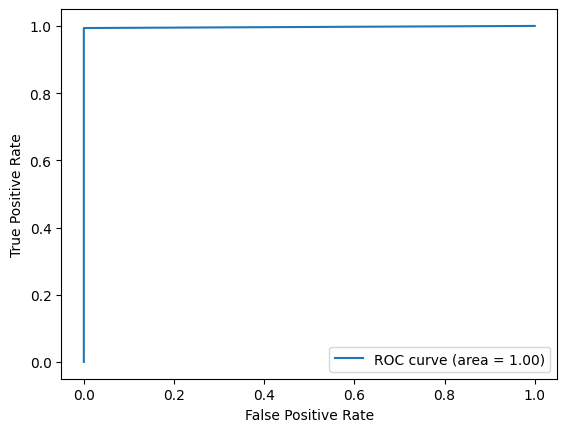

In [58]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,pred2)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Classification Report

In [59]:
from sklearn.metrics import classification_report

print("RBF-->\n",classification_report(y_test,pred))

RBF-->
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       828
           1       1.00      0.98      0.99       797

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

